In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

### Load 
df = pd.read_csv("/home/mouren/Data/valid_exp/summary_count_exonhancers_bilan.tsv", sep="\t", header=0)
df = df[~df['Log2FC'].str.contains('#', na=False)] # Remove rows with no log2FC values 

df["Log2FC"] = df["Log2FC"].str.replace(',', '.')
df["Input_STD"] = df["Input_STD"].str.replace(',', '.')

df["Log2FC"] = pd.to_numeric(df["Log2FC"])
df["count_sequence_AVO4Exonhmaxi4"] = pd.to_numeric(df["count_sequence_AVO4Exonhmaxi4"])
df["Input_STD"] = pd.to_numeric(df["Input_STD"])

# removes input count reads less than 500 and standard deviation above 20
filtered_df = df[(df['count_sequence_AVO4Exonhmaxi4'] >= 500) & (df['Input_STD'] <= 20)]

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

CTRLEEN v.s. EEK: t-test independent samples with Bonferroni correction, P_val=1.747e-19 stat=-9.238e+00
EEK v.s. EEG: t-test independent samples with Bonferroni correction, P_val=4.582e-05 stat=4.397e+00
EEK v.s. EEA: t-test independent samples with Bonferroni correction, P_val=1.744e-07 stat=5.494e+00
EEK v.s. EEAG: t-test independent samples with Bonferroni correction, P_val=2.348e-12 stat=7.249e+00


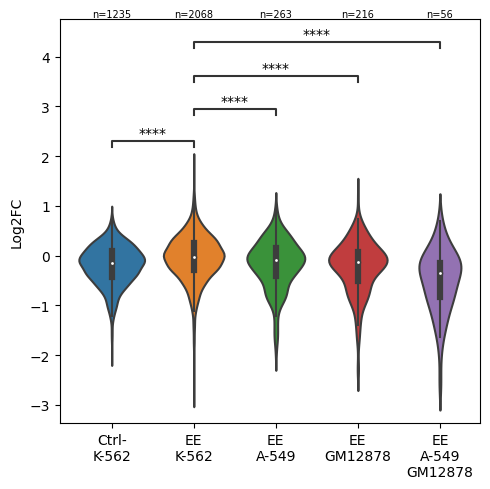

In [20]:
categories_to_plot = ["CTRLEEN", "EEK", "EEG","EEA","EEAG"]

### plot 
plt.figure(figsize=(5, 5))

ax = sns.violinplot(data=filtered_df, x='Category2', y='Log2FC',order=categories_to_plot,) #, width=2) #,cut=0)

#stats
from statannot import add_stat_annotation
add_stat_annotation(ax, data=filtered_df, x='Category2', y='Log2FC', order= categories_to_plot,
                    box_pairs=[("CTRLEEN", "EEK"), ("EEK", "EEG"), ("EEK", "EEA"), ("EEK", "EEAG")],
                    test='t-test_ind', text_format='star', loc='inside', verbose=1)

#Display results
category_counts = filtered_df['Category2'].value_counts()
category_means = filtered_df.groupby('Category2')['Log2FC'].mean()

for category in ax.get_xticklabels():
    cat_name = category.get_text()
    count = category_counts[cat_name]
    mean = category_means[cat_name]
    ax.text(category.get_position()[0], ax.get_ylim()[1] - 0, f'n={count}', #\nmean={mean:.2f}', 
            ha='center', va='bottom', fontsize=7, color='black')

plt.xlabel(None)
plt.ylabel('Log2FC')
plt.xticks([0,1,2,3,4],labels=["Ctrl-\nK-562","EE\nK-562","EE\nA-549","EE\nGM12878","EE\nA-549\nGM12878"])
plt.tight_layout()

plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig4/starr_cell_lines.pdf", format="pdf", bbox_inches="tight", dpi=450)
plt.savefig("/home/mouren/Images/tls1/supplementary_figures/supp_fig4/starr_cell_lines.png", format="png", bbox_inches="tight", dpi=450)

plt.show()